# The loans interest rate in Prosper

### Investigation Overview
In this investigation, I wanted to look at the loan interest rate, which factors can influence this rate, and the other related characteristics. An interest rate is the percentage of principal charged by the lender for the use of its money. It's very important to know what our interest rate is.

### Dataset overview
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, loan status, borrower APR and rate, current loan status, borrower income and income range and many others. For the analysis we selected 23 variables. There were also some missing values that have been removed. Some missing or erroneous values have been replaced. The names of columns have been renamed for better readability and some variables were of the incorrect data type, so we converted them. The variables Prosper rating and The income range were converted to categorical data type with the categories and orderedness.

In [361]:
# Import necessary packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [362]:
# Load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [363]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [364]:
# Selected features for the analysis
column_names = ['ListingNumber','ListingCreationDate','Term','LoanStatus','BorrowerAPR','BorrowerRate','EmploymentStatusDuration',
                'IsBorrowerHomeowner','BankcardUtilization','DebtToIncomeRatio','IncomeRange','ProsperScore','ProsperRating (Alpha)','ListingCategory (numeric)',
                'BorrowerState','Occupation','IncomeVerifiable','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment',
                'EstimatedReturn','EstimatedLoss']

In [365]:
def select_columns(data, column_names):
    new_frame = df.loc[:, column_names]
    return new_frame

In [366]:
df_subset = select_columns(df, column_names)

In [367]:
df_subset

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatusDuration,IsBorrowerHomeowner,BankcardUtilization,DebtToIncomeRatio,...,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,EstimatedReturn,EstimatedLoss
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,2.0,True,0.00,0.17,...,NaN,0,CO,Other,True,3083.333333,9425,330.43,NaN,NaN
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,44.0,False,0.21,0.18,...,A,2,CO,Professional,True,6125.000000,10000,318.93,0.05470,0.0249
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,NaN,False,NaN,0.06,...,NaN,0,GA,Other,True,2083.333333,3001,123.32,NaN,NaN
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,113.0,True,0.04,0.15,...,A,16,GA,Skilled Labor,True,2875.000000,10000,321.45,0.06000,0.0249
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,44.0,True,0.81,0.26,...,D,2,MN,Executive,True,9583.333333,15000,563.97,0.09066,0.0925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,2013-04-14 05:55:02.663000000,36,Current,0.22354,0.1864,246.0,True,0.80,0.13,...,C,1,IL,Food Service Management,True,4333.333333,10000,364.74,0.09500,0.0699
113933,537216,2011-11-03 20:42:55.333000000,36,FinalPaymentInProgress,0.13220,0.1110,21.0,True,0.69,0.11,...,A,7,PA,Professional,True,8041.666667,2000,65.57,0.08070,0.0200
113934,1069178,2013-12-13 05:49:12.703000000,60,Current,0.23984,0.2150,84.0,True,0.73,0.51,...,D,1,TX,Other,True,2875.000000,10000,273.35,0.08578,0.1025
113935,539056,2011-11-14 13:18:26.597000000,60,Completed,0.28408,0.2605,94.0,True,0.69,0.48,...,C,2,GA,Food Service,True,3875.000000,15000,449.55,0.15950,0.0850


In [368]:
# Drop rows with missing APR
df_subset['BorrowerAPR'].dropna(inplace=True)

In [369]:
df_subset.BorrowerAPR.isnull().sum()

0

In [370]:
df_subset.BorrowerState.isnull().sum()

5515

In [371]:
# Replace nan's with 'Not avalaible' in 'BorrowerState' column
df_subset['BorrowerState'].replace(np.nan, 'Not avalaible', inplace=True)

In [372]:
df_subset.BorrowerState.unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'Not avalaible',
       'AL', 'AZ', 'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH',
       'NC', 'WA', 'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT',
       'DC', 'MA', 'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID',
       'MT', 'HI', 'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'],
      dtype=object)

In [373]:
# Replace nan's with 'Not avalaible' in 'Occupation' column
df_subset['Occupation'].replace(np.nan, 'Not available', inplace = True)

In [374]:
df_subset.columns

Index(['ListingNumber', 'ListingCreationDate', 'Term', 'LoanStatus',
       'BorrowerAPR', 'BorrowerRate', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'BankcardUtilization', 'DebtToIncomeRatio',
       'IncomeRange', 'ProsperScore', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'EstimatedReturn', 'EstimatedLoss'],
      dtype='object')

In [375]:
# Change the names of variables for better readability
df_subset.rename(columns= {'ListingNumber':'listing_number','ListingCreationDate':'listing_date', 'Term':'term',
                           'LoanStatus':'loan_status', 'BorrowerAPR':'APR','BorrowerRate':'interest_rate',
                           'EmploymentStatusDuration':'employment_duration','IsBorrowerHomeowner':'is_borrower_homeowner',
                           'BankcardUtilization':'bank_card_utilization',
                           'DebtToIncomeRatio':'debt_to_income_ratio','IncomeRange':'income_range',
                           'ProsperScore':'prosper_score','ProsperRating (Alpha)':'prosper_rating',
                           'ListingCategory (numeric)':'loan_category','BorrowerState':'state',
                           'Occupation':'occupation','IncomeVerifiable':'income_verifiable', 'StatedMonthlyIncome':'monthly_income',
                           'LoanOriginalAmount':'loan_orig_amount','MonthlyLoanPayment':'monthly_payment',
                           'EstimatedLoss':'estimated_loss','EstimatedReturn':'estimated_return'}, inplace=True)

In [376]:
df_subset.listing_date = pd.to_datetime(df_subset.listing_date)
df_subset['listing_date'] = df_subset['listing_date'].dt.date

In [377]:
# Convert incorrect data types
df_subset.listing_number = df_subset.listing_number.astype('object')
df_subset.loan_status = df_subset.loan_status.astype('category')
df_subset.loan_category = df_subset.loan_category.astype('category')
df_subset.occupation = df_subset.occupation.astype('category')
df_subset.monthly_income = df_subset.monthly_income.astype('int')
df_subset.monthly_payment = df_subset.monthly_payment.astype('int')

In [378]:
df_subset['term'] = df_subset.term.astype('category')

In [379]:
df_subset['listing_date'] = pd.to_datetime(df_subset.listing_date)

In [380]:
df_subset['year'] = df_subset['listing_date'].dt.year

In [381]:
df_subset.loan_category = df_subset.loan_category.astype('str')

In [382]:
new_category = {'0':'Not Avalaible',
               '1':'Debt Consolidation',
               '2':'Home Improvement',
               '3':'Business',
               '4':'Personal Loan',
               '5':'Student Use',
               '6':'Auto',
               '7':'Other',
               '8':'Baby & Adoption',
               '9':'Boat',
               '10':'Cosmetic Procedure',
               '11':'Engagement Ring',
               '12':'Green Loans',
               '13':'Household Expenses',
               '14':'Large Purchases',
               '15':'Medical/Dental',
               '16':'Motorcycle',
               '17':'RV',
               '18':'Taxes',
               '19':'Vacation',
               '20':'Wedding Loans'}

In [383]:
df_subset['loan_category'] = df_subset['loan_category'].map(new_category)

In [384]:
df_subset.loan_category.value_counts()

Debt Consolidation    58308
Not Avalaible         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby & Adoption         199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: loan_category, dtype: int64

In [385]:
# Set the parameters
params = {'figure.figsize':(9,7),
         'axes.labelsize':13,
         'axes.titlesize':16,
         'xtick.labelsize':11,
         'ytick.labelsize':11
         }
plt.rcParams.update(params)
sns.set_style('darkgrid')

In [386]:
def make_histogram(x, bins,ax=None,**kwargs):
    title = kwargs.pop( 'title' )
    xlabel = kwargs.pop( 'xlabel' )
    ylabel = kwargs.pop( 'ylabel' )
    plt.figure()
    plt.hist(x,bins,**kwargs)
    fig = plt.gcf()
    for axis in fig.axes:
        axis.set_title( title )
        axis.xaxis.set_label_text( xlabel )
        axis.yaxis.set_label_text( ylabel )
    return axis

In [387]:
df_subset.interest_rate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: interest_rate, dtype: float64

In [388]:
bins_2 = np.arange(0, df_subset.interest_rate.max() + 0.02, 0.02)

### The interest rate distribution 
The distribution of the interest rate is unimodal. From the area slightly below **10%**, there is an increase in the frequency. The first peak is between **10% and 20%** following by decreasing of the frequency. Interestingly, there is a steep jump, the second peak, in the frequency **at 30%** rather than a smooth decrease of frequencies.

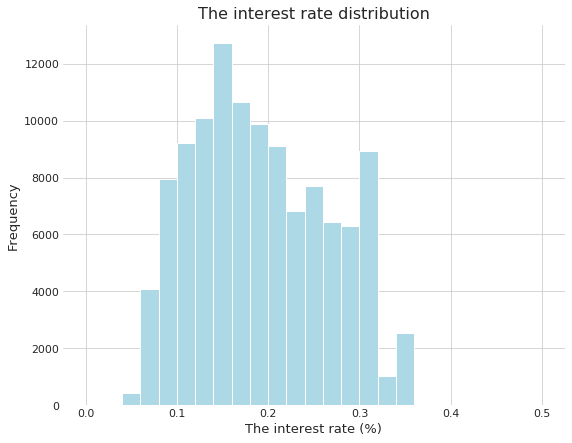

In [389]:
sns.set_style("whitegrid")
labels = {'title':'The interest rate distribution','xlabel':'The interest rate (%)','ylabel':'Frequency'}
make_histogram(df_subset.interest_rate, bins_2, color = 'lightblue', **labels)
sns.despine(left=True, bottom=True);

In [390]:
df_subset[df_subset['monthly_income'] <= 1750002].sort_values('monthly_income',ascending = False)

,listing_number,listing_date,term,loan_status,APR,interest_rate,employment_duration,is_borrower_homeowner,bank_card_utilization,debt_to_income_ratio,...,loan_category,state,occupation,income_verifiable,monthly_income,loan_orig_amount,monthly_payment,estimated_return,estimated_loss,year
53167,560783,2012-02-20,36,Current,0.35797,0.3177,114.0,True,0.61,NaN,...,Business,OR,Professional,False,1750002,4000,173,0.1246,0.1650,2012
53014,694401,2013-01-04,12,Completed,0.25785,0.1795,117.0,True,0.62,NaN,...,Business,CA,Other,False,618547,4000,366,0.0584,0.0975,2013
17411,501462,2011-04-08,36,Completed,0.35643,0.3199,121.0,True,0.86,0.0,...,Debt Consolidation,HI,Professional,True,483333,7500,326,0.1487,0.1470,2011
57133,499194,2011-03-24,36,Current,0.35643,0.3199,271.0,True,0.00,0.0,...,Home Improvement,CT,Other,True,466666,4000,174,0.1487,0.1470,2011
8066,500651,2011-04-02,36,Completed,0.35643,0.3199,183.0,True,0.00,0.0,...,Debt Consolidation,IL,Police Officer/Correction Officer,True,416666,2000,87,0.1087,0.1830,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63410,528529,2011-09-20,36,Current,0.30532,0.2699,5.0,False,0.52,NaN,...,Other,GA,Other,False,0,4500,183,0.1414,0.1120,2011
7388,652238,2012-10-10,36,Current,0.35797,0.3177,1.0,False,0.49,NaN,...,Debt Consolidation,CA,Other,False,0,2500,108,0.1174,0.1625,2012
44523,574109,2012-03-31,36,Chargedoff,0.35797,0.3177,126.0,False,0.54,NaN,...,Medical/Dental,MD,Other,False,0,4000,173,0.1246,0.1650,2012
51391,103797,2007-02-26,36,Completed,0.10351,0.0966,64.0,False,0.11,NaN,...,Not Avalaible,LA,Homemaker,False,0,4950,158,NaN,NaN,2007


In [391]:
income_percentile = np.percentile(df_subset.monthly_income, 99)

In [392]:
income_percentile

20526.239999999976

In [393]:
df_subset[df_subset['monthly_income'] > 20526]

,listing_number,listing_date,term,loan_status,APR,interest_rate,employment_duration,is_borrower_homeowner,bank_card_utilization,debt_to_income_ratio,...,loan_category,state,occupation,income_verifiable,monthly_income,loan_orig_amount,monthly_payment,estimated_return,estimated_loss,year
196,656502,2012-10-18,60,Current,0.15752,0.1346,89.0,True,0.11,0.04000,...,Vacation,NY,Other,True,33333,25000,574,0.09060,0.0299,2012
224,1130508,2014-01-10,36,Current,0.13799,0.1099,114.0,True,0.34,0.11000,...,Debt Consolidation,WI,Sales - Commission,True,33333,30000,982,0.06388,0.0324,2014
291,1209399,2014-02-15,60,Current,0.15868,0.1355,25.0,True,0.72,NaN,...,Debt Consolidation,NY,Sales - Commission,False,25000,15000,345,0.07192,0.0474,2014
307,1064774,2013-12-10,36,Current,0.15223,0.1239,26.0,True,0.15,NaN,...,Debt Consolidation,NJ,Professional,False,40000,15000,501,0.06910,0.0399,2013
334,717871,2013-02-22,36,Current,0.21025,0.1734,27.0,True,0.76,0.19000,...,Home Improvement,CT,Executive,True,27500,12000,429,0.09120,0.0624,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113422,863075,2013-08-07,36,Current,0.22712,0.1899,60.0,True,0.93,0.07000,...,Home Improvement,NJ,Executive,True,45833,15000,549,0.09550,0.0724,2013
113471,519104,2011-07-29,36,Current,0.20200,0.1799,140.0,False,0.98,0.09000,...,Home Improvement,CA,Engineer - Electrical,True,25000,11304,408,0.10740,0.0595,2011
113475,745740,2013-04-06,36,Current,0.24246,0.2049,38.0,True,0.80,0.17000,...,Debt Consolidation,FL,Principal,True,20833,3500,130,0.09840,0.0824,2013
113776,586583,2012-05-06,12,Completed,0.09986,0.0628,69.0,False,0.54,0.10000,...,Debt Consolidation,NY,Computer Programmer,True,23750,3000,258,0.03280,0.0200,2012


In [394]:
# Get names of indexes where monthly income is larger than 20526
index_list_number = df_subset[df_subset['monthly_income'] > 20526].index

In [395]:
df_subset.drop(index_list_number, inplace = True)

In [396]:
df_subset[df_subset['monthly_income'] > 20526]

,listing_number,listing_date,term,loan_status,APR,interest_rate,employment_duration,is_borrower_homeowner,bank_card_utilization,debt_to_income_ratio,...,loan_category,state,occupation,income_verifiable,monthly_income,loan_orig_amount,monthly_payment,estimated_return,estimated_loss,year


In [397]:
df_subset.dropna(subset=['prosper_score'],inplace=True)

In [398]:
df_subset.prosper_score = df_subset.prosper_score.astype('int')

In [399]:
prosper_rating_order = ['AA','A','B','C','D','E','HR']

In [400]:
rating_order = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_rating_order)

In [401]:
df_subset['prosper_rating'] = df_subset['prosper_rating'].astype(rating_order)

In [403]:
df_subset.income_range = df_subset.income_range.str.strip('$')

In [405]:
range_ord = ['1-24,999','25,000-49,999','50,000-74,999','75,000-99,999','100,000+']

In [406]:
range_order = pd.api.types.CategoricalDtype(ordered = True, categories = range_ord)

In [407]:
df_subset.income_range = df_subset.income_range.astype(range_order)

### The interest rate distribution throughout the years
The plot shows macroeconomic situation throughout the years. This is displayed in the shape of interest rate distribution. 2011 and 2012 were years of slight financial crisis. We can thus see sharp increase in interest rate offerd. In year 2011, the range of high rates was approximately from **25% to 30%**. In year 2012 the rates were from **30% to about 33**%. This is returning to normal from 2013 onwards. The black dashed line represents average interest rate throughout the years. As expected, the highest average interest rate about **23%** was in **year 2011**. The lowest average rates were **18% and 15%** in years **2013 and 2014, respectively**.

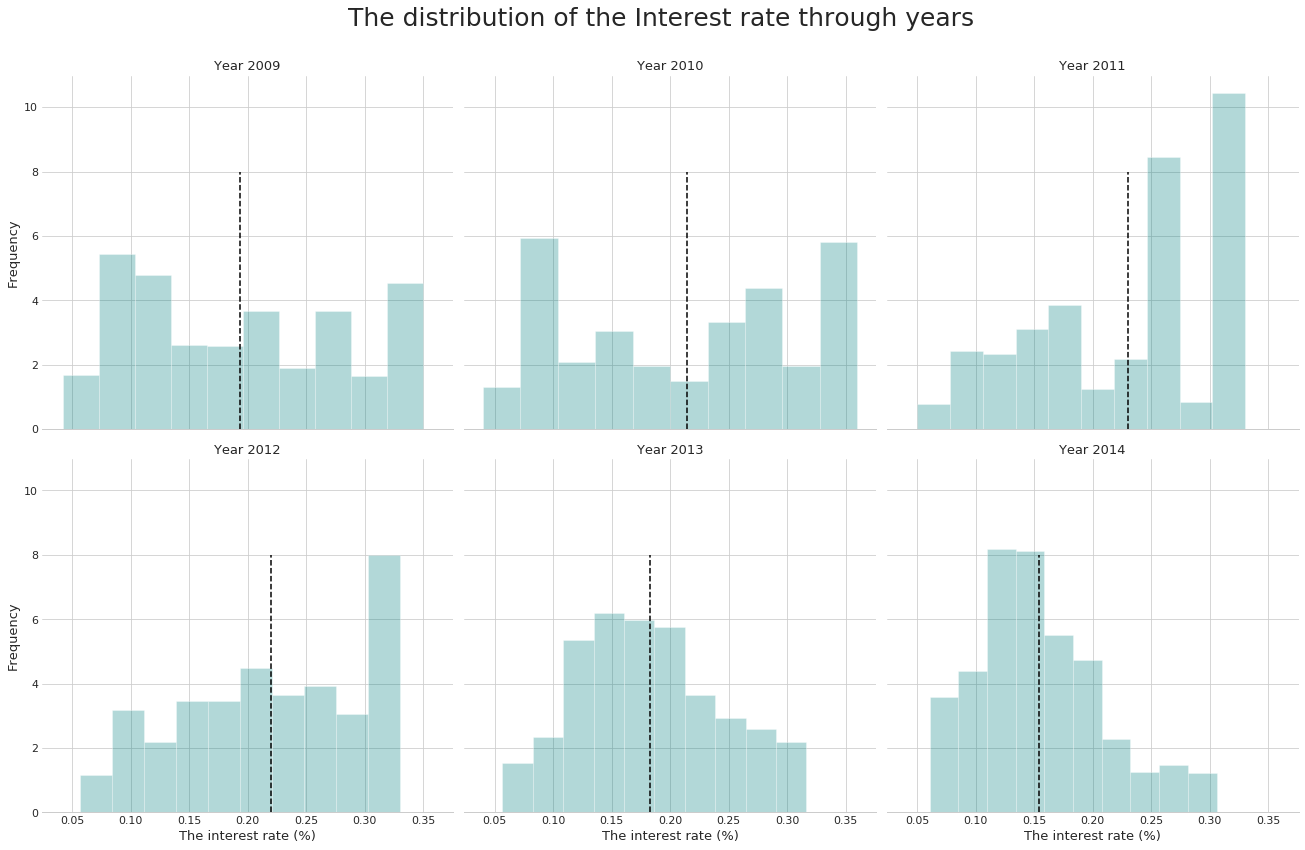

In [408]:
g = sns.FacetGrid(data = df_subset, col = 'year', col_wrap = 3, size = 6)
g.map(plt.hist,'interest_rate',normed = True,alpha = 0.3, color='teal')
g.set_titles("Year {col_name}")
sns.despine(left=True, bottom=False, right=True)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('The distribution of the Interest rate through years',fontsize=25)
g.set_axis_labels(x_var='The interest rate (%)', y_var='Frequency')
for m,ax in zip(df_subset.groupby('year').interest_rate.mean(), g.axes.ravel()):
    ax.vlines(m,ymin=0,ymax=8, linestyle="dashed")   

### The interest rate vs. Prosper score
To determine personal loan interest rates, lenders evaluate a number of criteria. One of them is Prosper score.

The Prosper score ranges from 1 to 11. The score 11 is considered as the best, or lowest risk, score.
According to our graph, we can say that there is not monotonic relationship between The interest rate and The prosper score.  The correlation coefficient is **-0.65**. Indeed, **the main trend is the higher Prosper score, the lower Interest rate, thus a more advantegeous for the borrower**.

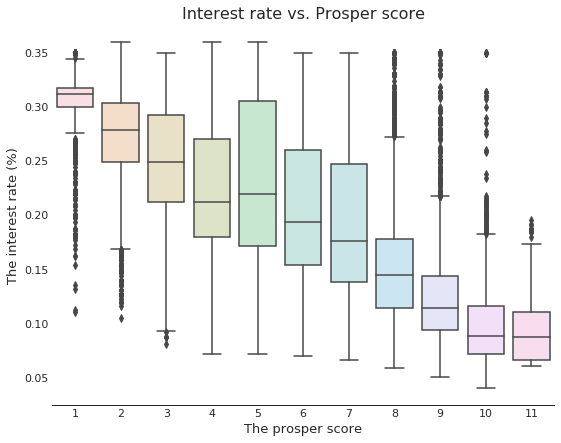

In [409]:
sns.set_style('white')
ax = sns.boxplot(data = df_subset,x ='prosper_score', y = 'interest_rate', color = None)
plt.title('Interest rate vs. Prosper score')
plt.xlabel('The prosper score')
plt.ylabel('The interest rate (%)')
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.despine(left=True, bottom=False, right=True);

In [410]:
def create_boxplot(x, y, ax=None, **kwargs):
    title = kwargs.pop( 'title' )
    xlabel = kwargs.pop( 'xlabel' )
    ylabel = kwargs.pop( 'ylabel' )
    plt.figure()
    sns.boxplot(x,y,**kwargs)
    fig = plt.gcf()
    for axis in fig.axes:
        axis.set_title( title )
        axis.xaxis.set_label_text( xlabel )
        axis.yaxis.set_label_text( ylabel )
    return axis

### The interest rate vs. Prosper rating
Every loan application is assigned a Prosper Rating.

**Prosper Ratings** allow potential investors to easily consider a loan application's level of risk because the rating represents an estimated average annualized loss rate range to the investor. (AA being the best score (the lowest risk), HR being the worst score (the highest risk)). We can see that the loans which have assigned the best rating have the lowest interest rate, **under 10%**. The middle rating C exceeds the 20% interest rate. The loans with HR rating that is the worst have the highest interest rate, **above 30%**.

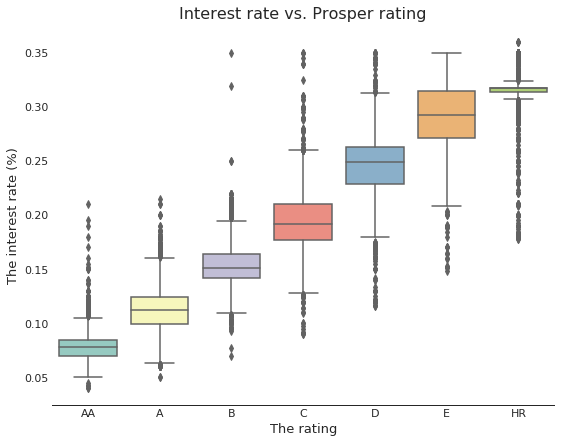

In [411]:
sns.set_style('white')
labels = {'title':'Interest rate vs. Prosper rating','xlabel':'The rating','ylabel':'The interest rate (%)'}
create_boxplot(df_subset.prosper_rating, df_subset.interest_rate, palette = 'Set3', **labels)
sns.despine(left=True, bottom=False, right=True);

### The interest rate vs. the Loan original amount

Prosper offers a wide range of personal loan amounts and terms available through their social lending marketplace.

In our dataset, the lowest loan amount is of value 1000 and the highest loan is of value 35000. The average loan amount is approximately 9000. Half of the loans is under the value 7500$. From the regplot, we can see the negative relationship between loan amount and the interest rate with the correlation coefficient **-0.41**. From the value about 10.000, we can see that **an increase in the loan amount is associated with a decrease in the interest rate**.

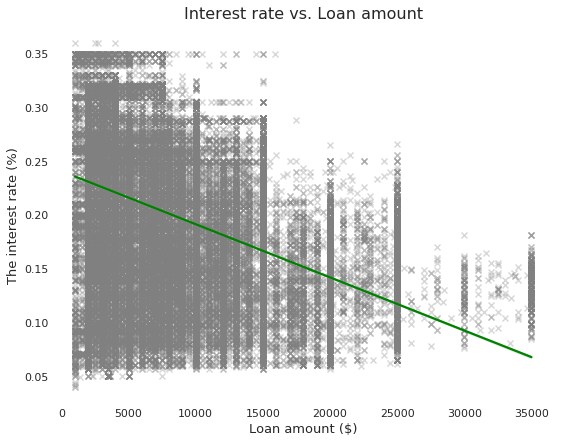

In [412]:
#Create the regplot
sns.regplot(data = df_subset, x = 'loan_orig_amount', y = 'interest_rate',x_jitter = .5, 
            truncate = True, scatter_kws = {'color': 'grey', 'alpha': 0.3}, line_kws = {'color': 'green'}, ci = 95,marker='x')
plt.title('Interest rate vs. Loan amount')
plt.xlabel('Loan amount ($)')
plt.ylabel('The interest rate (%)')
sns.despine(left=True, bottom=True, right=True);

### The interest rate vs. Term
The interest rates might differ in case of different loan terms. The **60** months loans have the smallest range of the Interest rates. The 36 and 60 terms loans have a very similar median of value about **18%**. For the 12 months loans, the interest rates varies from approximatelly 10% to slightly above 20%.

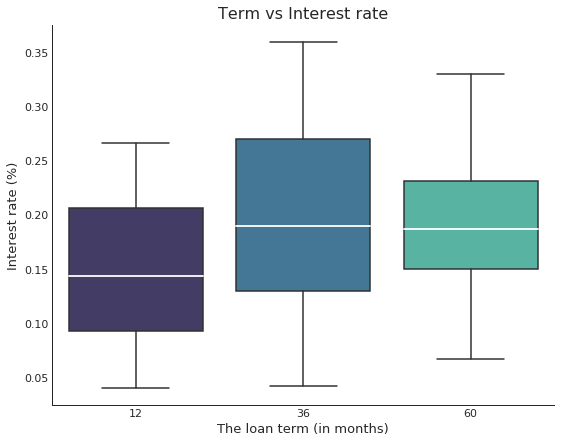

In [413]:
medianprops = dict(color="white",linewidth=1.8)
labels = {'title':'Term vs Interest rate','xlabel':'The loan term (in months)','ylabel':'Interest rate (%)'}
create_boxplot(df_subset.term, df_subset.interest_rate, medianprops=medianprops, palette = 'mako',**labels)
sns.despine(top=True, right=True, left=False, bottom=False);

### The interest rate vs. Income ranges
The highest interest rate is for the income range **1-24.999$** and the average interest rate in this group is about 24%. The borrowers who are in the last income range (100.000+) have the best interest rates compared to the other groups. The interest rate is about **17%** in average for this group. 
**So the main trend is that the higher income range, the lower interest rate**.

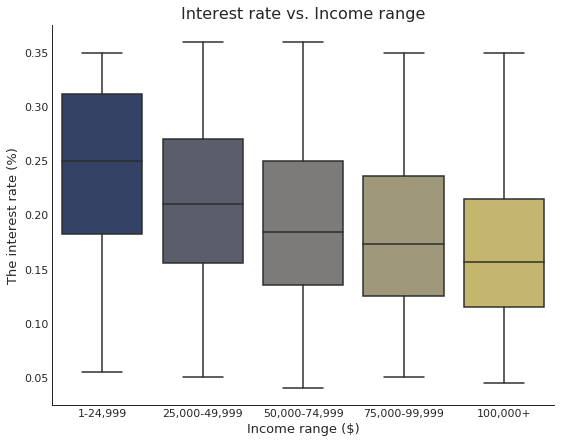

In [414]:
# Display the relationship between income ranges and the interest rate
labels = {'title':'Interest rate vs. Income range','xlabel':'Income range ($)','ylabel':'The interest rate (%)'}
create_boxplot(df_subset.income_range, df_subset.interest_rate, palette = 'cividis',**labels)
sns.despine(top=True, right=True, left=False, bottom=False);

In [415]:
def create_boxplot_hue(x, y, hue, ax=None, **kwargs):
    title = kwargs.pop( 'title' )
    xlabel = kwargs.pop( 'xlabel' )
    ylabel = kwargs.pop( 'ylabel' )
    plt.figure()
    sns.boxplot(x,y,hue, **kwargs)
    fig = plt.gcf()
    for axis in fig.axes:
        axis.set_title( title )
        axis.xaxis.set_label_text( xlabel )
        axis.yaxis.set_label_text( ylabel )
    return axis

### The borrower's Income range vs. Loan amount by Term
Major pattern can be observed in generally rising loan original amounts with rising income range. Median loan original amount is rather similar across all income ranges for **12 months term loans**. There is sharp increase in median loan original amount from group **2** (25.000-49.999) to group **3** (50.000-74.999) for 60 months term loans. The loan original amount median is them rather similar throughout groups **3** (50.000-74.999) to **5** (100.000+). 

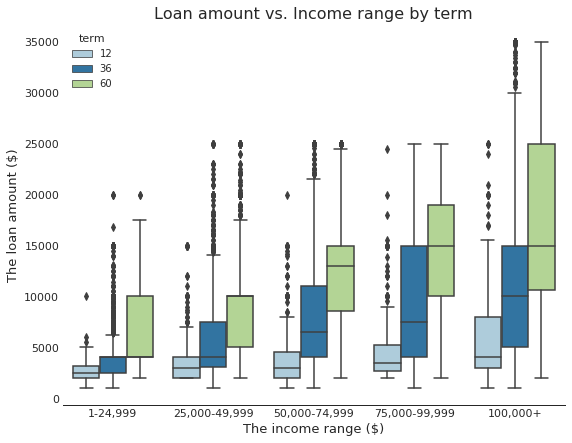

In [417]:
labels = {'title':'Loan amount vs. Income range by term','xlabel':'The income range ($)','ylabel':'The loan amount ($)'}
create_boxplot_hue(df_subset.income_range, df_subset.loan_orig_amount, hue=df_subset.term ,palette = 'Paired',**labels)
sns.despine(top=True, right=True, left=True, bottom=False);

### Interest rate vs. Estimated return by the Term
From the graph, we can see that the estimated return for the lenders is estimated to be positive in case of the 12, 36 and 60 months term loans. The major trend is observed in generally rising of the Estimated return with rising Interest rate. On the other hand, there are some cases when the 36 months term show estimated return in negative values. 36 months term loans are the most common in the Prosper. 

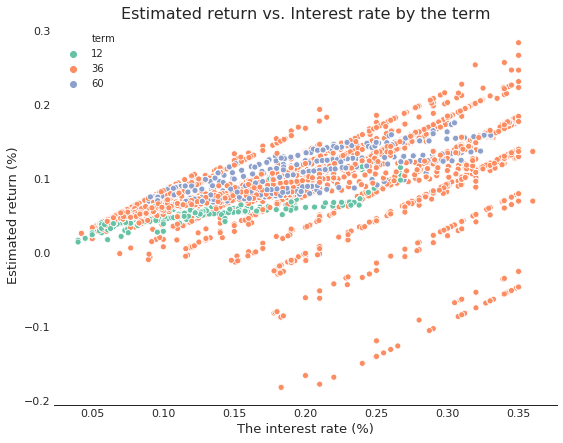

In [418]:
ax = sns.scatterplot(df_subset.interest_rate,df_subset.estimated_return,hue=df_subset.term, palette='Set2')
plt.legend()
plt.title('Estimated return vs. Interest rate by the term')
plt.xlabel('The interest rate (%)')
plt.ylabel('Estimated return (%)')
sns.despine(top=True, right=True, left=True, bottom=False);

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle